<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [3]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [4]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [5]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [6]:
# Answer:
movies.loc[:, 'duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [7]:
# Answer:
movies.sort_values('duration')

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
742,7.6,Following,R,Mystery,69,"[u'Jeremy Theobald', u'Alex Haw', u'Lucy Russe..."
351,8.0,Frankenstein,UNRATED,Horror,70,"[u'Colin Clive', u'Mae Clarke', u'Boris Karloff']"
938,7.4,Alice in Wonderland,G,Animation,75,"[u'Kathryn Beaumont', u'Ed Wynn', u'Richard Ha..."
405,7.9,The Bride of Frankenstein,NOT RATED,Horror,75,"[u'Boris Karloff', u'Elsa Lanchester', u'Colin..."
303,8.0,The Nightmare Before Christmas,PG,Animation,76,"[u'Danny Elfman', u'Chris Sarandon', u""Catheri..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

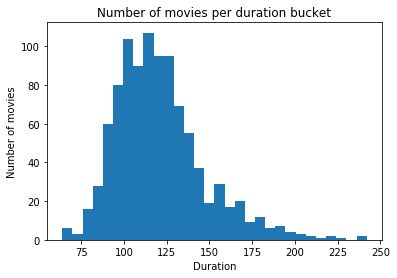

In [8]:
# Answer:
ax = movies.loc[:, 'duration'].plot(kind='hist', bins=30)
ax.set_xlabel('Duration')
ax.set_ylabel('Number of movies')
ax.set_title('Number of movies per duration bucket');

#### Use a box plot to display that same data.

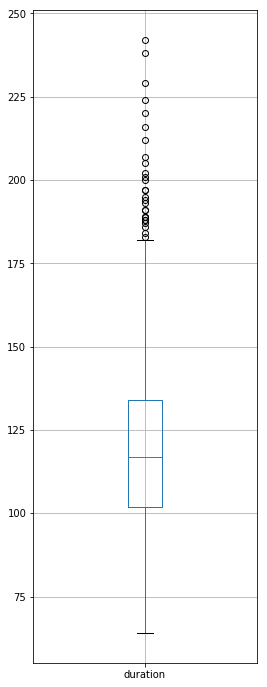

In [9]:
# Answer:
movies.boxplot('duration', figsize=(4, 12));

## Intermediate level

#### Count how many movies have each of the content ratings.

In [10]:
# Answer:
movies.loc[:, 'content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

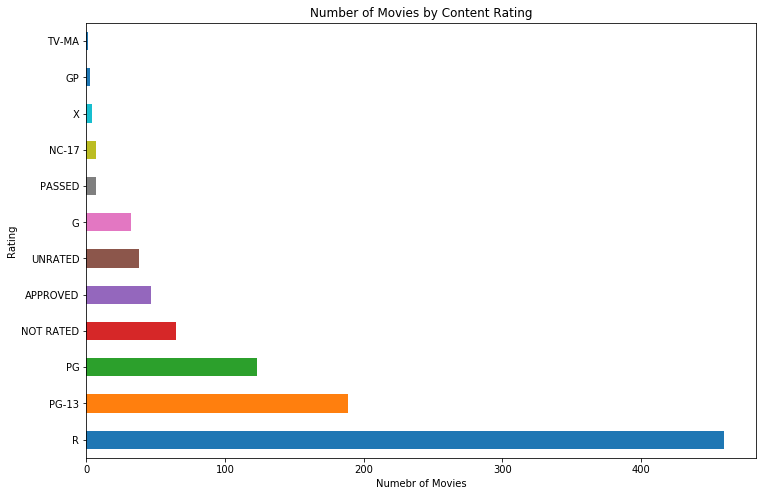

In [11]:
# Answer:
ax = movies.loc[:, 'content_rating'].value_counts().plot(kind='barh', figsize=(12,8))
ax.set_xlabel('Numebr of Movies')
ax.set_ylabel('Rating')
ax.set_title('Number of Movies by Content Rating');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

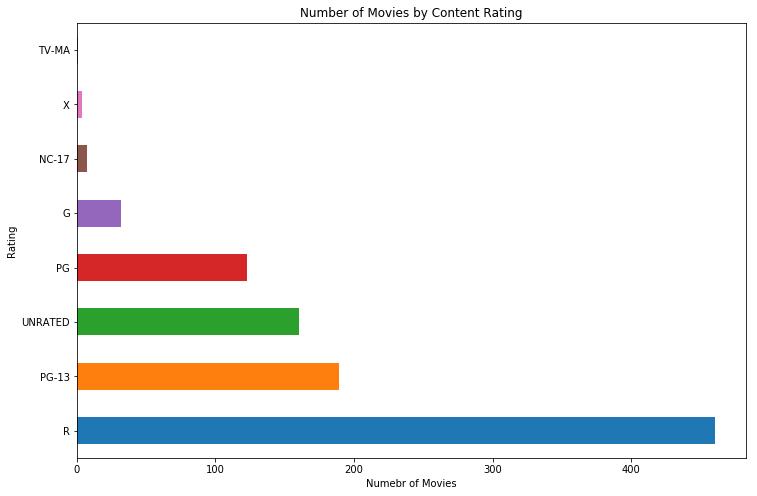

In [12]:
# Answer:
movies.loc[:, 'content_rating'].replace(to_replace=['NOT RATED', 'APPROVED', 'PASSED', 'GP'], value='UNRATED', inplace=True)

#To test if this result worked
ax = movies.loc[:, 'content_rating'].value_counts().plot(kind='barh', figsize=(12,8))
ax.set_xlabel('Numebr of Movies')
ax.set_ylabel('Rating')
ax.set_title('Number of Movies by Content Rating');

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [13]:
# Answer:
movies.loc[:, 'content_rating'].replace(to_replace=['X', 'TV-MA'], value='NC-17', inplace=True)
#checking the work using an alternative method
mov_rat = movies.loc[:, 'content_rating'].isin(['X', 'TV-MA', 'NC-17'])
movies.loc[mov_rat, :]

,star_rating,title,content_rating,genre,duration,actors_list
86,8.4,A Clockwork Orange,NC-17,Crime,136,"[u'Malcolm McDowell', u'Patrick Magee', u'Mich..."
219,8.1,Who's Afraid of Virginia Woolf?,NC-17,Drama,131,"[u'Elizabeth Taylor', u'Richard Burton', u'Geo..."
387,8.0,Midnight Cowboy,NC-17,Drama,113,"[u'Dustin Hoffman', u'Jon Voight', u'Sylvia Mi..."
456,7.9,Blue Is the Warmest Color,NC-17,Drama,179,"[u'L\xe9a Seydoux', u'Ad\xe8le Exarchopoulos',..."
486,7.8,Evil Dead II,NC-17,Comedy,84,"[u'Bruce Campbell', u'Sarah Berry', u'Dan Hicks']"
604,7.7,Mysterious Skin,NC-17,Drama,105,"[u'Brady Corbet', u'Joseph Gordon-Levitt', u'E..."
715,7.6,Man Bites Dog,NC-17,Comedy,95,"[u'Beno\xeet Poelvoorde', u'Jacqueline Poelvoo..."
755,7.6,"Lust, Caution",NC-17,Drama,157,"[u'Tony Chiu Wai Leung', u'Wei Tang', u'Joan C..."
796,7.6,The Evil Dead,NC-17,Horror,85,"[u'Bruce Campbell', u'Ellen Sandweiss', u'Rich..."
913,7.5,Suspiria,NC-17,Horror,92,"[u'Jessica Harper', u'Stefania Casini', u'Flav..."


#### Count the number of missing values in each column.

In [14]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [15]:
# Answer:
# 1. inspect the movies
mov_null = movies.loc[:, 'content_rating'].isnull()
movies.loc[mov_null, :]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [16]:
# Answer:
# 2. replace the values
movies.loc[:, 'content_rating'].fillna(value='PG', inplace=True)

# Validate
mov_null = movies.loc[:, 'content_rating'].isnull()
print(movies.loc[mov_null, :])
print(movies.isnull().sum())

Empty DataFrame
Columns: [star_rating, title, content_rating, genre, duration, actors_list]
Index: []
star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [17]:
# Answer:
long_mov = movies.loc[(movies.loc[:, 'duration'] >= 120), :]
short_mov = movies.loc[(movies.loc[:, 'duration'] < 120), :]
print('Average Star Rating on long movies', long_mov.loc[:, 'star_rating'].mean())
print('Average Star Rating on long movies', short_mov.loc[:, 'star_rating'].mean())

Average Star Rating on long movies 7.948898678414082
Average Star Rating on long movies 7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

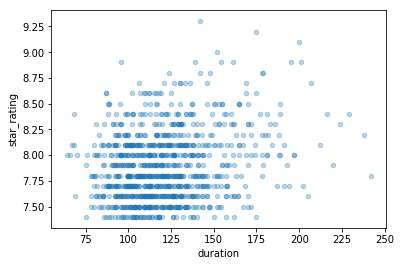

In [18]:
# Answer:
ax = movies.plot(kind='scatter', x='duration', y='star_rating', alpha=0.3)

#### Calculate the average duration for each genre.

In [19]:
# Answer:
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

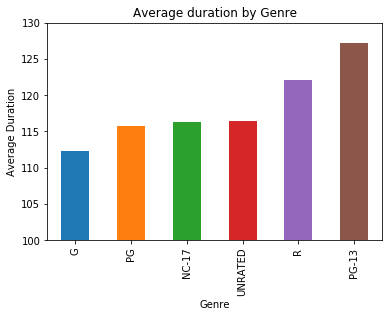

In [20]:
# Answer:

ax = movies.groupby('content_rating')['duration'].mean().sort_values().plot(kind='bar')
ax.set_xlabel('Genre')
ax.set_ylabel('Average Duration')
ax.set_title('Average duration by Genre')
ax.set_ylim(100, 130);

#### Determine the top rated movie (by star rating) for each genre.

In [21]:
# Answer:

top_in_genre = movies.groupby('genre')['star_rating'].transform('max') == movies['star_rating']
movies.loc[top_in_genre, :]


,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
25,8.6,Life Is Beautiful,PG-13,Comedy,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
29,8.6,City Lights,UNRATED,Comedy,87,"[u'Charles Chaplin', u'Virginia Cherrill', u'F..."
30,8.6,Spirited Away,PG,Animation,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [22]:
# Answer:
# 1. find the movies with duplicated titles
mov_title_dup = movies.loc[:, 'title'].duplicated()
movies.loc[mov_title_dup, :]

,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,PG,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [23]:
# Answer:
dup_title = ['The Girl with the Dragon Tattoo', 'Dracula', 'Les Miserable', 'True Grit']
mov_dup_test = movies.loc[:, 'title'].isin(dup_title)
movies.loc[mov_dup_test, :]

#they are not true duplicates

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
936,7.4,True Grit,PG,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


**You only need to choose one of the options below.** However, solving for multiple options would count as "extra credit" that could e.g. raise your score from a 2 ("meets expectations") to a 3 ("exceeds expectations").

#### Option 1: manually create a list of relevant genres, then filter using that list

In [24]:
# Answer see what to include in the manual list
movies.loc[:, 'genre'].value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [25]:
#Answer filter for the list of genres with more than 10 movies
rel_genre = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']

mov_rel = movies.loc[:, 'genre'].isin(rel_genre)
mov_rel2 = movies.loc[mov_rel, :]
mov_rel2.groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [26]:
# Answer:
num_genre = movies.loc[:, 'genre'].value_counts()
num_genre2 = num_genre.drop(num_genre[num_genre < 10].index)
num_genre2

mov_rel_auto = movies.loc[:, 'genre'].isin(num_genre2)
mov_rel_auto2 = movies.loc[mov_rel, :]
mov_rel_auto2.groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [46]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!